# **PA 01: k-NN Classification** 

### Instructions


*   The aim of this assignment is to give you hands-on experience with a real-life
machine learning application.
*   You will be implementing a kNN-based digit classifier.
*   You must use the Python programming language.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment1. Zip these files in a folder and name
the folder Name_RollNo_Assignment1. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**

### Introduction

The purpose of this assignment is to get you familiar with the k nearest neighbor classification. You will be training a k-NN model and using it to classify images of handwritten digits from the famous **MNIST dataset**, which contains 70,000
images of digits and their respective labels. You will first implement the code from scratch and then replicate the entire code using the scikit-learn library.

## **Part 1: Implement from Scratch (75 marks)**

You are not allowed to use scikit-learn or any other machine learning toolkit for this
part. You have to implement your own k-NN classifier from scratch. You may use
Pandas, NumPy, Matplotlib, Seaborn, and other standard Python libraries.

### Importing Libraries

In [1]:
# Importing relevant libraries. You may add other libraries if needed (except scikit-learn or any other machine learning toolkit)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics as st
from numba import jit, njit

%matplotlib inline

### Loading Dataset

The MNIST dataset consists of 70,000 labelled images of handwritten digits, each of size 28 pixels by 28 pixels. 

The dataset given to you is in a CSV file. The CSV file has 70,001 rows and 785 columns. Each row represents one image of a handwritten digit.
The first row indicates what each column means (Print the loaded dataset to understand this). You should remove this row when creating the dataset. 
The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

For quicker computation, you will sample 20% of the entire dataset.

You can use the Pandas library to load the CSV file but the final dataset should be stored in a Numpy array of shape (14000, 785).

In [2]:
# Load the dataset from the folder on Drive where you have saved the dataset. Path will be like "/content/drive/..." 

#########################

# Enter your code here

data  = pd.read_csv('./../mnist_digit/mnist.csv').to_numpy()[1:]

#########################

/home/rafay/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

In [4]:
# Sample 20% of the dataset. Please note that this is not the train-test split. This is just a sample of the dataset. We are doing this to reduce the computation time.

#########################

# Enter your code here

#########################
np.random.seed(69)
np.random.shuffle(data)
num_training_samples = int(0.2 * data.shape[0])
dataset = data[0:num_training_samples]
dataset.shape

(14000, 785)

In [5]:
# Implement a function to display an image from your loaded dataset given the image index. 
# You can use the Pillow library for this purpose.


def display_image(image_ind, data):
  image = data[image_ind].reshape(28,28).astype(np.float32)
  plt.imshow(image)
  

Now divide the dataset into training and test sets (around an 85-15 split).
More precisely, take the first 11900 images for the training set and the last 2100 for the test set.

Both the resulting splits/sets should be stored in Numpy arrays of shape (num_split_images, 785).
Depending on your approach, you can also separate the labels into a different array (or two arrays).

In [6]:
# Train-test split

#########################

# Enter your code here

#########################

X_train = dataset[0:11900, 1:].astype(np.float64)
Y_train = dataset[0:11900, 0].astype(np.int32)
X_test  = dataset[11900:, 1:].astype(np.float64)
Y_test  = dataset[11900:, 0].astype(np.int32)

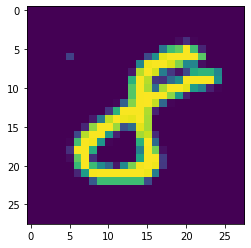

In [7]:
# Testing the display image function

display_image(2000, X_train)

### Implementing k-NN Classifier

Now you need to implement all of the tasks that follow.

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

**Euclidean Distance:**

$$
d(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

**Manhattan Distance:**

$$
d(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$

In [8]:
# Implement functions for Euclidean and Manhattan distances

#########################

# Enter your code here

#########################

@njit(fastmath=True)
def Euclidean(a, b):
    # return np.sqrt(np.sum(np.square(np.subtract(a,b))))
    return np.linalg.norm(a-b)

@njit(fastmath=True)
def Manhattan(a, b):
    # return np.sum(np.abs(np.subtract(a,b)))
    return np.linalg.norm(a-b, ord=1)


Next, create your own k-Nearest Neighbors classifier function by performing the following
tasks:
1. For a test data point, find its distance from all training
instances.
2. Sort the calculated distances in ascending order based on distance values.
3. Choose k training samples with minimum distances from the test data point.
4. Return the most frequent class of these samples. (Your function should work
with Euclidean distance as well as Manhattan distance. Pass the distance
metric as a parameter in the k-NN classifier function. Your function should
also be general enough to work with any value of k.)

For values of k where a tie occurs, you need to break the tie by backing off to the k-1 value. In case there is still a tie, you will continue decreasing k until there is a clear winner.

In [9]:
# Implement k-Nearest Neighbors classifier function
# Feel free to make any helper functions to assist you and to make the code modular

#########################

# Enter your code here

#########################

# First of all, find the distances
def findDistances(X, test_point, distance_function):
    return np.array([distance_function(test_point, i) for i in X])

# For all those distances, find the indices of the kth 
def findKNeighbours(distances, k):
    return np.argsort(distances)[0:k]

# Find the mode of the labels
def returnFreq(Y, neighbours, k):
    return st.mode(Y[neighbours])

# Predict
def predict(X, Y, test_point, k, distance_function):
    distances = findDistances(X, test_point, distance_function)
    neighbours = findKNeighbours(distances, k)
    prediction = returnFreq(Y, neighbours, k)
    return prediction

Next, implement an evaluation function that calculates the confusion matrix, classification accuracy and macro-average F1
score of your classifier. The function should take as input the predicted labels and the true labels. 

We recommend that you do not use hard coding in this function. Try it at your own risk :p

In [125]:
# Implement evaluation function

#########################

# Enter your code here

#########################

# calculate confusion matrix
def calc_confusion_matrix(predicted_labels, true_labels):

    confusion_matrix = np.zeros((10,10))

    for i, j in zip(predicted_labels, true_labels):
    
        confusion_matrix[i, j] += 1

    return np.matrix(confusion_matrix.astype(np.int32))

# Calculating the accuracy from predicted and total number of true labels
def calculate_accuracy(predictions, true_labels):
    accuracy = (np.count_nonzero(np.equal(predictions, true_labels))) / len(true_labels)
    return accuracy

# calculate macro-f1
def calculate_f1(conf_matrix):
    micro_f1 = []
    for i in range(0,10):
        true_pos  = conf_matrix[i, i]
        false_neg = np.sum(conf_matrix[:, i]) - true_pos
        false_pos = np.sum(conf_matrix[i]) - true_pos

        recall    = (true_pos)/(true_pos + false_neg)
        precision = (true_pos)/(true_pos + false_pos)

        micro_f1.append((2 * precision * recall)/(precision + recall))

    return sum(micro_f1)/len(micro_f1)

# return the calculated metrics
def evaluation(predicted_labels, true_labels):

    conf_matrix = calc_confusion_matrix(predicted_labels, true_labels)
    accuracy = calculate_accuracy(predicted_labels, true_labels)
    macro_f1 = calculate_f1(conf_matrix)

    return conf_matrix, accuracy, macro_f1

In [10]:
# Model function, runs the knn on all test points and returns the predictions

def KNN(X_train, Y_train, X_test, Y_test, k, distance_function):
    predicted = np.array([predict(X_train, Y_train, i, k, distance_function) for i in X_test])

    return predicted

Next, implement a function that performs m-fold cross-validation on the training data for a specified value of k. (In cross-validation, you divide
the training data set into m parts. m-1 parts will be used for training and 1 part
will be used for validation. Then you will take a different part of your data as a
validation data set and train your algorithm on the rest of the data set.) 

The function should return predicted labels for the entire training data (size of list/array should be equal to the size of training dataset) for the specified value of k. This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your evaluation function together with the actual labels.

In [11]:
# Implement function to perform m-fold cross-validation

#########################

# Enter your code here

#########################
def cross_validation(X_train, Y_train, k, m, distance_function):
    
    validation_datasets_X = np.array(np.array_split(X_train, m))
    validation_datasets_Y = np.array(np.array_split(Y_train, m))

    predicted = np.array([])

    for i in range(0, m):
        
        print(f"Fold {i+1}")

        validation_X_test = validation_datasets_X[i]
        validation_Y_test = validation_datasets_Y[i]

        if i == 0:
            validation_X_train = np.concatenate(validation_datasets_X[1:])
            validation_Y_train = np.concatenate(validation_datasets_Y[1:])
        elif i == m-1:
            validation_X_train = np.concatenate(validation_datasets_X[0:i])
            validation_Y_train = np.concatenate(validation_datasets_Y[0:i])
        else:
            validation_X_train = np.concatenate((np.concatenate(validation_datasets_X[0:i]), np.concatenate(validation_datasets_X[i+1:])))
            validation_Y_train = np.concatenate((np.concatenate(validation_datasets_Y[0:i]), np.concatenate(validation_datasets_Y[i+1:])))
        
        prediction = KNN(validation_X_train, validation_Y_train, validation_X_test, validation_Y_test, k, distance_function)
        
        predicted = np.concatenate((predicted, prediction))

    return predicted

Now run your
cross-validation function on the training data using m = 5 for the values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10. Do
this for both the Euclidean distance and the Manhattan distance for each value of
k. Also run your evaluation function for each value of k for both distance metrics and report confusion matrix, classification accuracy and F1 score.

Each confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.

In [12]:
# Perform 5-fold cross-validation and report evaluation metrics

#########################

# Enter your code here

#########################
predictions_euc = {}
predictions_man = {}

for k in range(3,11):
    print(f"k : {k} ------------------------")
    predictions_euc[k] = cross_validation(X_train, Y_train, k, 5, Euclidean)
    predictions_man[k] = cross_validation(X_train, Y_train, k, 5, Manhattan)
    
    np.save(f"pred_k{k}_euc", predictions_euc[k])
    np.save(f"pred_k{k}_man", predictions_man[k])
    print("----------------------------")

k : 3 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 4 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 5 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 6 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 7 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 8 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 9 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 10 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fo

In [13]:
for k in range(1,3):
    print(f"k : {k} ------------------------")
    predictions_euc[k] = cross_validation(X_train, Y_train, k, 5, Euclidean)
    predictions_man[k] = cross_validation(X_train, Y_train, k, 5, Manhattan)
    
    np.save(f"pred_k{k}_euc", predictions_euc[k])
    np.save(f"pred_k{k}_man", predictions_man[k])
    print("----------------------------")

k : 1 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------
k : 2 ------------------------
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
----------------------------


In [36]:
# Just sorting them because i ran in a bit weird order of 3->10 and then 1->2.

predictions_euc_backup = predictions_euc
predictions_man_backup = predictions_man

predictions_euc = dict(sorted(predictions_euc.items()))
predictions_man = dict(sorted(predictions_man.items()))

for i in range(1,11):
    predictions_euc[i] = predictions_euc[i].astype(np.int32)
    predictions_man[i] = predictions_man[i].astype(np.int32)

Next, present the results as a graph with k values on the x-axis and classification accuracy
on the y-axis. Use a single plot to compare the two versions of the classifier (one
using Euclidean and the other using Manhattan distance metric). Make another
graph but with the F1 score on the y-axis this time. The graphs should be properly
labeled.

In [126]:
# Draw the required plots

#########################

# Enter your code here
accuracy_euc = []
accuracy_man = []

macro_f1_euc = []
macro_f1_man = []

conf_matrix_euc = []
conf_matrix_man = []

for i in range(1,11):
    conf_euc, acc_euc, f1_euc = evaluation(predictions_euc[i], Y_train)
    conf_man, acc_man, f1_man = evaluation(predictions_man[i], Y_train)
    
    accuracy_euc.append(acc_euc)
    accuracy_man.append(acc_man)

    macro_f1_euc.append(f1_euc)
    macro_f1_man.append(f1_man)

    conf_matrix_euc.append(conf_euc)
    conf_matrix_man.append(conf_man)
    
#########################

Text(0.5, 0.98, 'Comparison of accuracy and f1 scores for different distance metrics, and different k values')

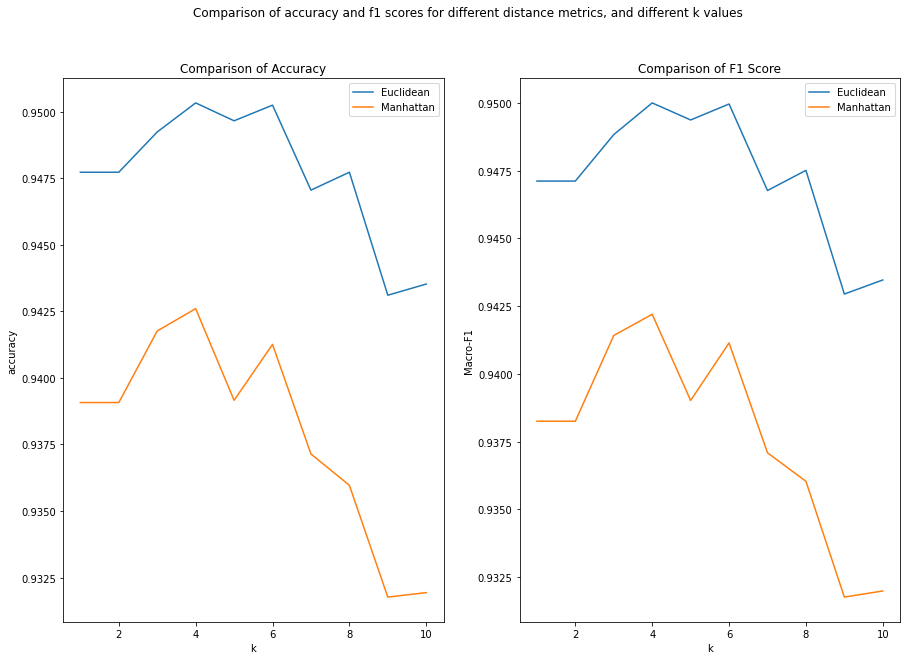

In [127]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

ax[0].plot([i for i in range(1,11)], accuracy_euc)
ax[0].plot([i for i in range(1,11)], accuracy_man)
ax[0].set_xlabel("k")
ax[0].set_ylabel("accuracy")
ax[0].legend(["Euclidean", "Manhattan"])
ax[0].set_title("Comparison of Accuracy")

ax[1].plot([i for i in range(1,11)], macro_f1_euc)
ax[1].plot([i for i in range(1,11)], macro_f1_man)
ax[1].set_xlabel("k")
ax[1].set_ylabel("Macro-F1")
ax[1].legend(["Euclidean", "Manhattan"])
ax[1].set_title("Comparison of F1 Score")

fig.suptitle("Comparison of accuracy and f1 scores for different distance metrics, and different k values")

### Confusion matrices heatmap

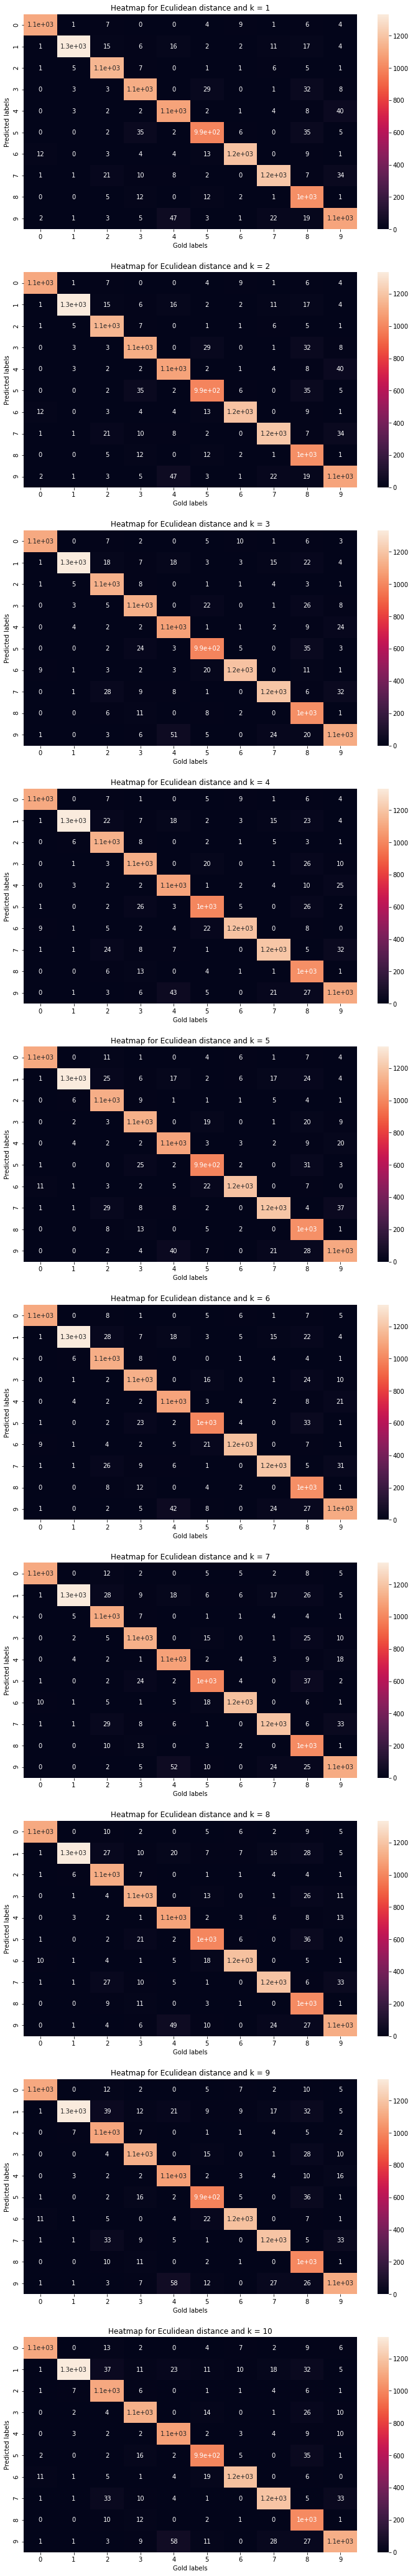

In [111]:
fig, ax = plt.subplots(ncols=1, nrows=10, figsize=(12,75))
for i in range(0,10):
    ax[i] = sns.heatmap(conf_matrix_euc[i], annot=True, ax = ax[i])
    # ax[i].set_xticks([1,2,3,4,5,6,7,8,9])
    # ax[i].set_yticks([1,2,3,4,5,6,7,8,9])
    ax[i].set_xlabel("Gold labels")
    ax[i].set_ylabel("Predicted labels")
    ax[i].set_title(f"Heatmap for Eculidean distance and k = {i+1}")

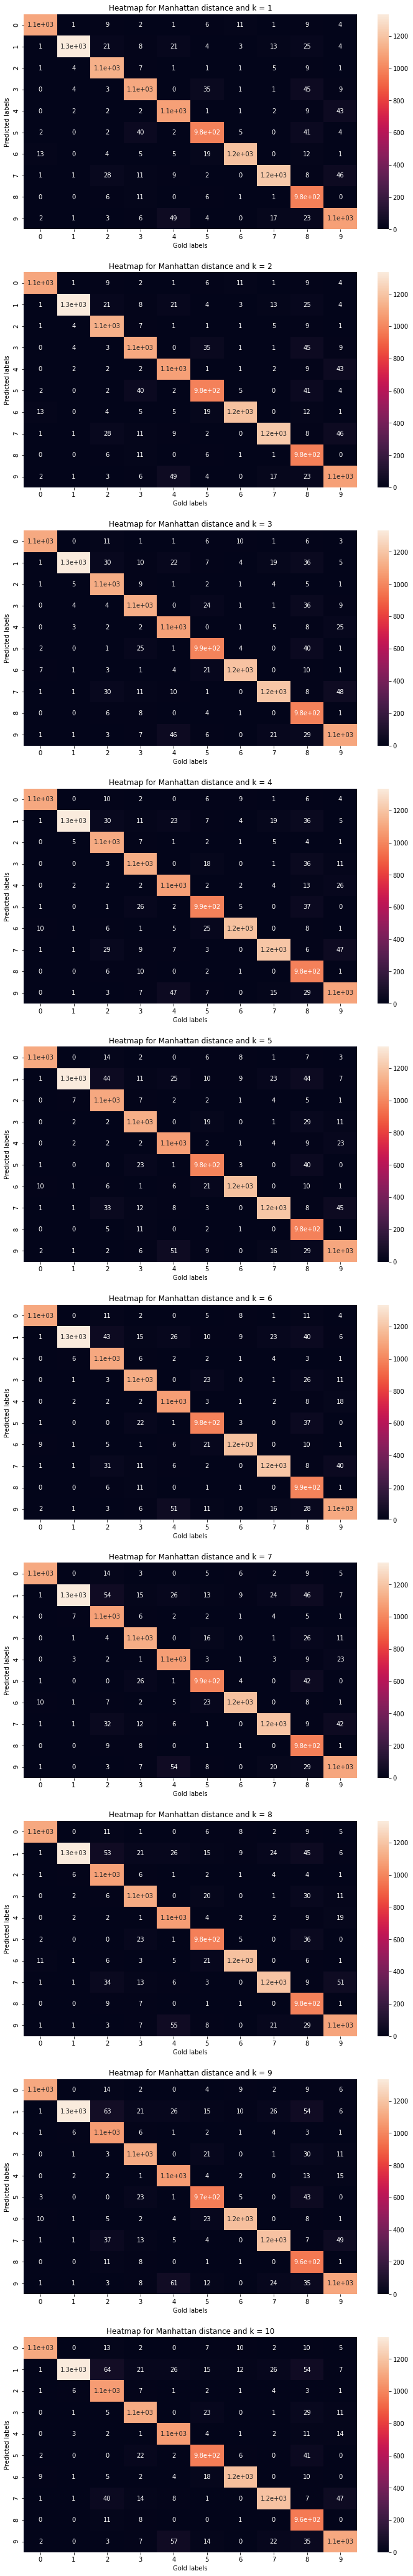

In [112]:
# For manhattan distances

fig, ax = plt.subplots(ncols=1, nrows=10, figsize=(12,75))

for i in range(0,10):
    ax[i] = sns.heatmap(conf_matrix_man[i], annot=True, ax = ax[i])
    ax[i].set_xlabel("Gold labels")
    ax[i].set_ylabel("Predicted labels")
    ax[i].set_title(f"Heatmap for Manhattan distance and k = {i+1}")

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?

In [59]:
# For both Eculidean and Manhattan distance metrics, k=3 gives the best accuracy and F1-score. 
k = 3

Finally, use the best value of k for both distance metrics and run it on the test
dataset. Find the confusion matrix, classification accuracy and F1 score and print
them. Keep in mind the earlier instructions about displaying confusion matrices.

In [88]:
# Use best values of k on test dataset

#########################

# Enter your code here
test_prediction_euc = KNN(X_train, Y_train, X_test, Y_test, k, Euclidean)
test_prediction_man = KNN(X_train, Y_train, X_test, Y_test, k, Manhattan)

conf_test_euc, acc_test_euc, f1_test_euc = evaluation(test_prediction_euc, Y_test)
conf_test_man, acc_test_man, f1_test_man = evaluation(test_prediction_man, Y_test)

print(f"Eculidean accuracy : {acc_test_euc}")
print(f"Eculidean F1 score : {f1_test_euc}")

print(f"Manhattan accuracy : {acc_test_man}")
print(f"Manhattan F1 score : {acc_test_man}")
#########################

Eculidean accuracy : 0.9595238095238096
Eculidean F1 score : 0.9587921533852344
Manhattan accuracy : 0.9542857142857143
Manhattan F1 score : 0.9542857142857143


Text(0.5, 1.0, 'Heatmap for Confusion matrix, Manhattan')

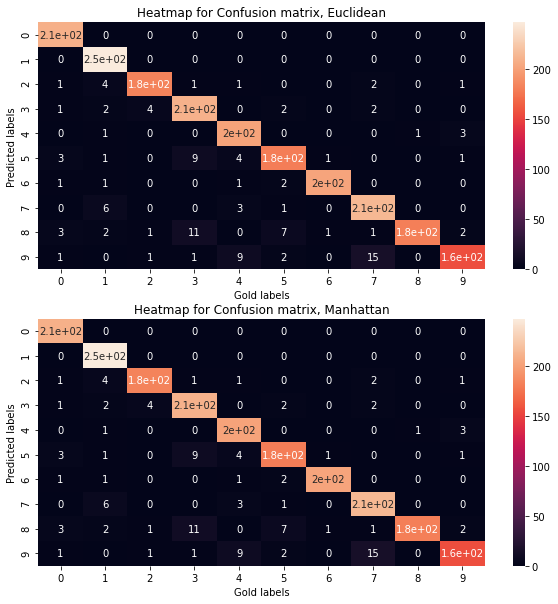

In [113]:
# Print confusion matrix for test data

fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0] = sns.heatmap(conf_test_euc, annot=True, ax = ax[0])
ax[0].set_xlabel("Gold labels")
ax[0].set_ylabel("Predicted labels")
ax[0].set_title("Heatmap for Confusion matrix, Euclidean")

ax[1] = sns.heatmap(conf_test_euc, annot=True, ax = ax[1])
ax[1].set_xlabel("Gold labels")
ax[1].set_ylabel("Predicted labels")
ax[1].set_title(f"Heatmap for Confusion matrix, Manhattan")

## **Part 2: Implement using Scikit-Learn (25 marks)**

In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your
classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1
but this time using scikit-learn. Perform 5-fold cross-validation and run
the k-NN classifier for values of k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 using both Euclidean
and Manhattan distance. Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the
accuracy, [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels. Also present
the results as a graph with k values on the x-axis and performance measures on the y-axis
just like you did in Part 1. Use a single plot to compare the two versions of the classifier
(one using Euclidean and the other using Manhattan distance metric). Finally, print the
best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix for each of the distance metrics.

Note that the confusion matrices must be displayed in the same way as in Part 1.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

predictions_euc = {}
predictions_man = {}

for k in range(1,11):
    model_euc = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
    model_man = KNeighborsClassifier(n_neighbors=k, metric = "manhattan")
    print(f"Running knn with Euclidean distance metric for k = {k}")
    predictions_euc[k] = cross_val_predict(model_euc, X_train, Y_train, cv=5)
    print(f"Running knn with Manhattan distance metric for k = {k}")
    predictions_man[k] = cross_val_predict(model_man, X_train, Y_train, cv=5)

Running knn with Euclidean distance metric for k = 1
Running knn with Manhattan distance metric for k = 1
Running knn with Euclidean distance metric for k = 2
Running knn with Manhattan distance metric for k = 2
Running knn with Euclidean distance metric for k = 3
Running knn with Manhattan distance metric for k = 3
Running knn with Euclidean distance metric for k = 4
Running knn with Manhattan distance metric for k = 4
Running knn with Euclidean distance metric for k = 5
Running knn with Manhattan distance metric for k = 5
Running knn with Euclidean distance metric for k = 6
Running knn with Manhattan distance metric for k = 6
Running knn with Euclidean distance metric for k = 7
Running knn with Manhattan distance metric for k = 7
Running knn with Euclidean distance metric for k = 8
Running knn with Manhattan distance metric for k = 8
Running knn with Euclidean distance metric for k = 9
Running knn with Manhattan distance metric for k = 9
Running knn with Euclidean distance metric for

In [98]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

def evaluation_sklearn(true, predicted, k, distance):
    accuracy    = accuracy_score(true, predicted)
    f1Score     = f1_score(true, predicted, average='macro')
    conf_matrix = confusion_matrix(true, predicted)

    print(f"Evaluation metrics for k = {k} with distance function {distance}.")
    print(f"Accuracy : {accuracy}")
    print(f"f1_score : {f1Score}")

    return conf_matrix, accuracy, f1Score

In [100]:
accuracy_euc = []
accuracy_man = []
f1_euc       = []
f1_man       = []
conf_euc     = []
conf_man     = []

for i in range(1,11):
    conf, acc, f1 = evaluation_sklearn(Y_train, predictions_euc[i], i, "Euclidean")
    accuracy_euc.append(acc)
    f1_euc.append(f1)
    conf_euc.append(conf)

    conf, acc, f1 = evaluation_sklearn(Y_train, predictions_man[i], i, "Manhattan")
    accuracy_man.append(acc)
    f1_man.append(f1)
    conf_man.append(conf)

Evaluation metrics for k = 1 with distance function Euclidean.
Accuracy : 0.9484033613445378
f1_score : 0.9478020264562901
Evaluation metrics for k = 1 with distance function Manhattan.
Accuracy : 0.9402521008403362
f1_score : 0.9394839092415103
Evaluation metrics for k = 2 with distance function Euclidean.
Accuracy : 0.9376470588235294
f1_score : 0.9366155594499045
Evaluation metrics for k = 2 with distance function Manhattan.
Accuracy : 0.9254621848739496
f1_score : 0.9241117028026219
Evaluation metrics for k = 3 with distance function Euclidean.
Accuracy : 0.9460504201680672
f1_score : 0.9454799927789626
Evaluation metrics for k = 3 with distance function Manhattan.
Accuracy : 0.9381512605042017
f1_score : 0.9376499903284137
Evaluation metrics for k = 4 with distance function Euclidean.
Accuracy : 0.9447058823529412
f1_score : 0.9442954984620802
Evaluation metrics for k = 4 with distance function Manhattan.
Accuracy : 0.9345378151260504
f1_score : 0.9341929723789925
Evaluation metri

Text(0.5, 0.98, 'Comparison of accuracy and f1 scores for different distance metrics, and different k values')

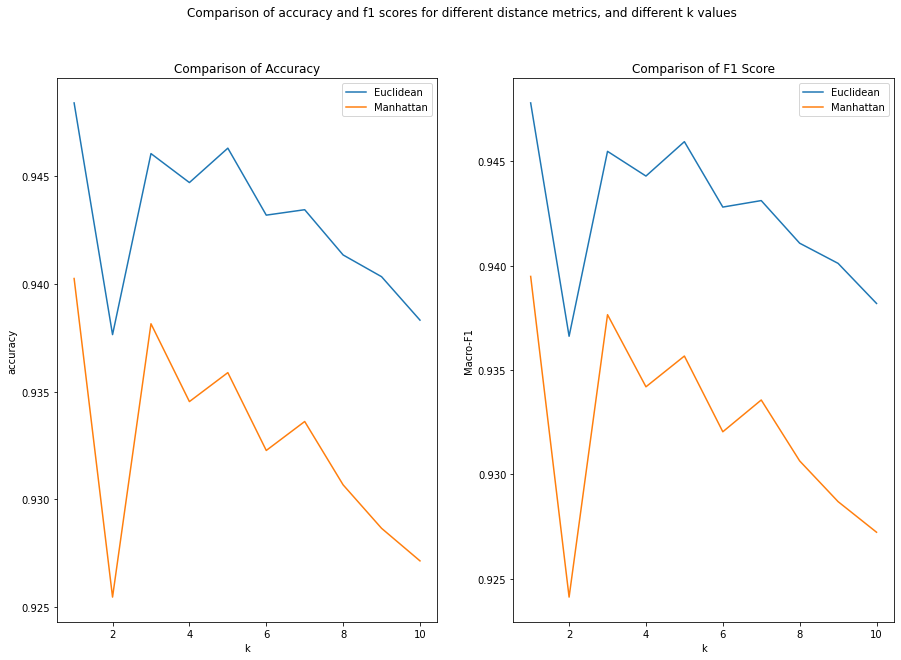

In [119]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

ax[0].plot([i for i in range(1,11)], accuracy_euc)
ax[0].plot([i for i in range(1,11)], accuracy_man)
ax[0].set_xlabel("k")
ax[0].set_ylabel("accuracy")
ax[0].legend(["Euclidean", "Manhattan"])
ax[0].set_title("Comparison of Accuracy")

ax[1].plot([i for i in range(1,11)], f1_euc)
ax[1].plot([i for i in range(1,11)], f1_man)
ax[1].set_xlabel("k")
ax[1].set_ylabel("Macro-F1")
ax[1].legend(["Euclidean", "Manhattan"])
ax[1].set_title("Comparison of F1 Score")

fig.suptitle("Comparison of accuracy and f1 scores for different distance metrics, and different k values")

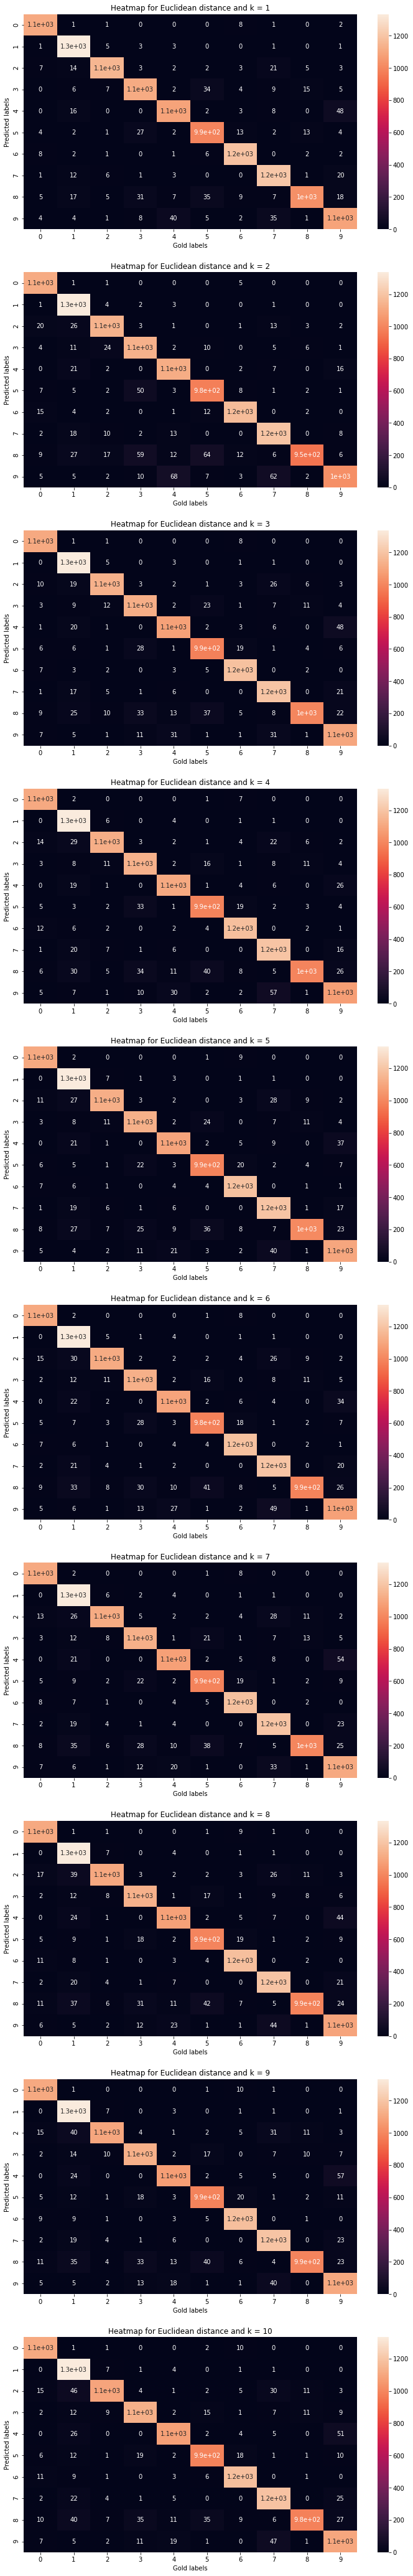

In [114]:
# heatmaps for euclidean

fig, ax = plt.subplots(ncols=1, nrows=10, figsize=(12,75))

for i in range(0,10):
    ax[i] = sns.heatmap(conf_euc[i], annot=True, ax = ax[i])
    ax[i].set_xlabel("Gold labels")
    ax[i].set_ylabel("Predicted labels")
    ax[i].set_title(f"Heatmap for Euclidean distance and k = {i+1}")

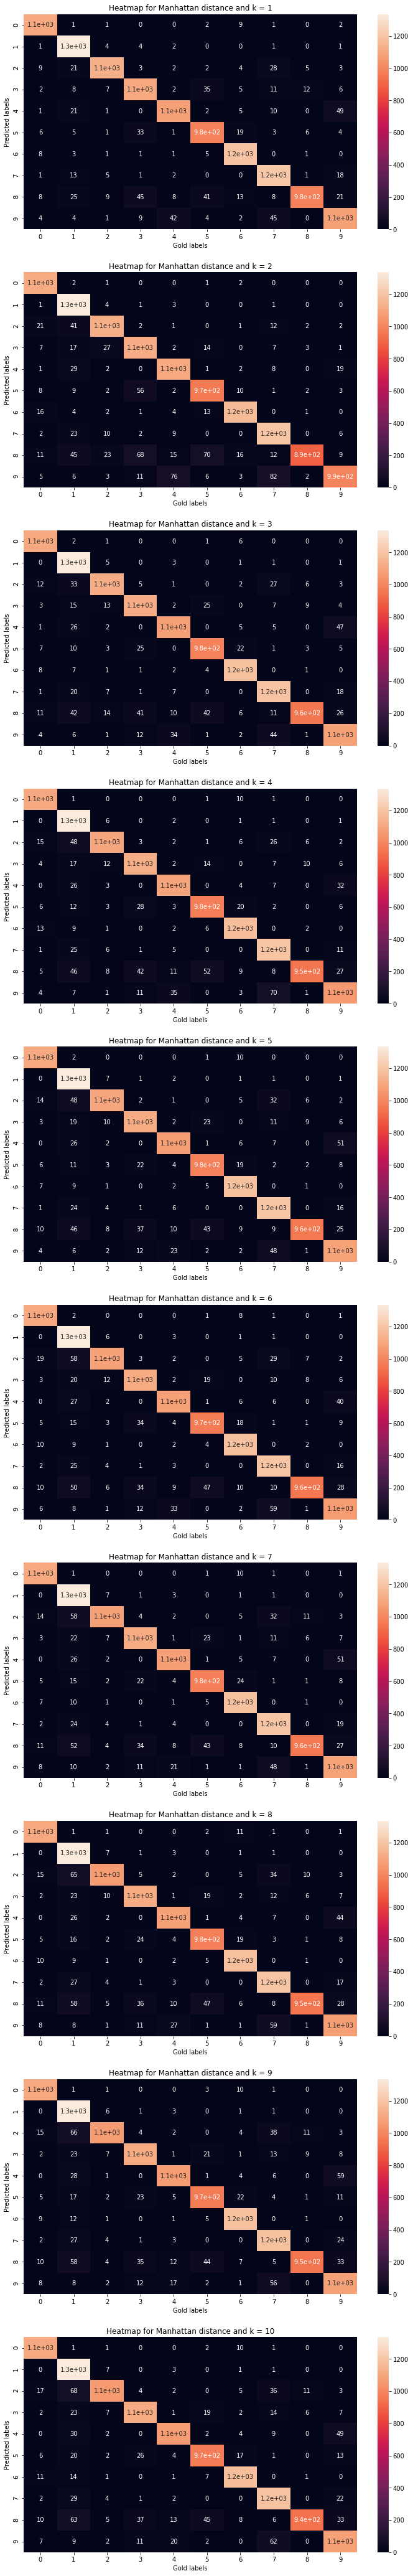

In [115]:
fig, ax = plt.subplots(ncols=1, nrows=10, figsize=(12,75))

for i in range(0,10):
    ax[i] = sns.heatmap(conf_man[i], annot=True, ax = ax[i])
    ax[i].set_xlabel("Gold labels")
    ax[i].set_ylabel("Predicted labels")
    ax[i].set_title(f"Heatmap for Manhattan distance and k = {i+1}")

In [120]:
# Predictions on the Test set
k = 3

model_euc = KNeighborsClassifier(n_neighbors=k, metric = "euclidean")
model_man = KNeighborsClassifier(n_neighbors=k, metric = "manhattan")

model_euc.fit(X_train, Y_train)
model_man.fit(X_train, Y_train)

predictions_euc = model_euc.predict(X_test)
predictions_man = model_man.predict(X_test)

conf_test_euc, acc_test_euc, f1_test_euc = evaluation_sklearn(Y_test, predictions_euc, k, "Euclidean")
conf_test_man, acc_test_man, f1_test_man = evaluation_sklearn(Y_test, predictions_man, k, "Manhattan")

Evaluation metrics for k = 3 with distance function Euclidean.
Accuracy : 0.9585714285714285
f1_score : 0.9578942836648556
Evaluation metrics for k = 3 with distance function Manhattan.
Accuracy : 0.9514285714285714
f1_score : 0.9508041620801284


Text(0.5, 1.0, 'Heatmap for Confusion matrix, Manhattan')

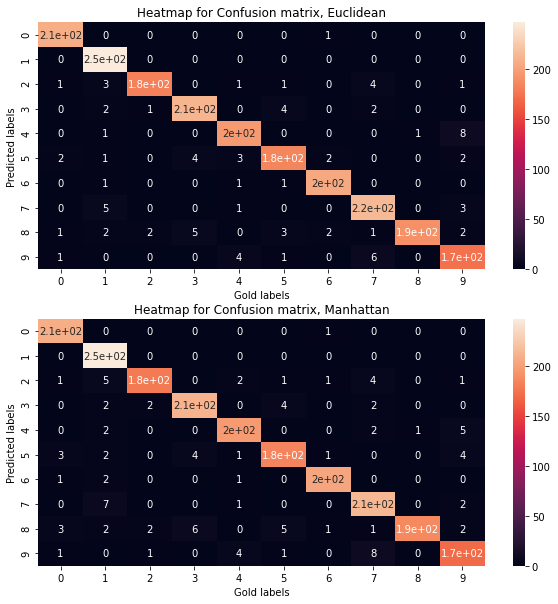

In [122]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0] = sns.heatmap(conf_test_euc, annot=True, ax = ax[0])
ax[0].set_xlabel("Gold labels")
ax[0].set_ylabel("Predicted labels")
ax[0].set_title("Heatmap for Confusion matrix, Euclidean")

ax[1] = sns.heatmap(conf_test_man, annot=True, ax = ax[1])
ax[1].set_xlabel("Gold labels")
ax[1].set_ylabel("Predicted labels")
ax[1].set_title(f"Heatmap for Confusion matrix, Manhattan")